# HW4 Fall 23 Code

## Q1

  0%|          | 0/51000 [00:00<?, ?it/s]

np.mean(rho_burned)=0.67648
np.var(rho_burned)=0.002
accepted/n_samples=0.583
90% equitailed credible set: (0.597, 0.743)


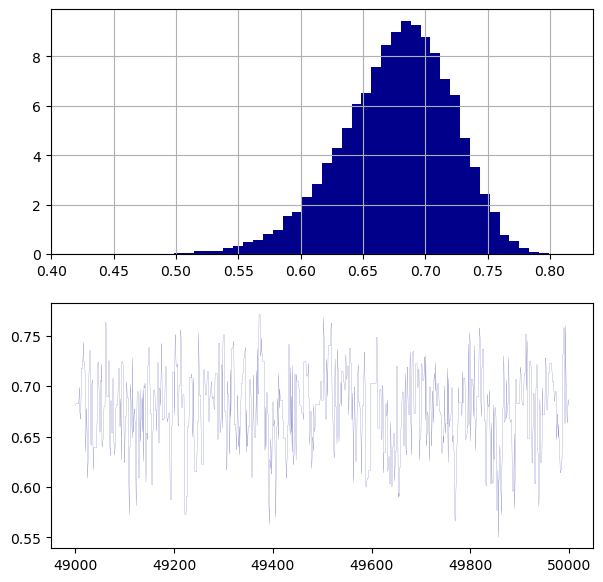

In [2]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

rng = np.random.default_rng(1245)
burn = 1000
n_samples = 51000

rho_array = np.zeros(n_samples)
accepted = 0

rho = 0.1  # init

unif = rng.uniform(size=n_samples)


def target(rho):
    sum_x_sq = 113.5602
    sum_y_sq = 101.6489
    sum_xy = 75.1491
    n = 100

    rho_clipped = np.clip(rho, -0.99999, 0.99999)

    return (1 - rho_clipped**2) ** (-0.5 * (n + 3)) * np.exp(
        -0.5
        / (1 - rho_clipped**2)
        * (sum_x_sq - 2 * rho_clipped * sum_xy + sum_y_sq)
    )


def proposal(rho, rng, part):
    assert part in ["a", "d"]

    if part == "a":
        return rng.uniform(rho - 0.1, rho + 0.1)
    elif part == "d":
        return rng.uniform(-1, 1)


for i in tqdm(range(n_samples)):
    rho_star = proposal(rho, rng, part="a")

    ratio = target(rho_star) / target(rho)
    if unif[i] < min(1, ratio):
        rho = rho_star
        accepted += 1

    rho_array[i] = rho

rho_burned = rho_array[burn:]

print(f"{np.mean(rho_burned)=:.5f}")
print(f"{np.var(rho_burned)=:.3f}")
print(f"{accepted/n_samples=:.3f}")

lower, upper = np.quantile(rho_burned, (0.05, 0.95))
print(f"90% equitailed credible set: ({lower:.3f}, {upper:.3f})")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))
ax1.grid(True)
ax1.hist(rho_burned, color="darkblue", density=True, bins=50)

ax2.plot(
    range(n_samples - burn * 2, n_samples - burn),
    rho_burned[-burn:],
    color="darkblue",
    linewidth=0.1,
)
plt.savefig("Spring2025HW4Q1c.png")

  0%|          | 0/51000 [00:00<?, ?it/s]

np.mean(rho_burned)=0.677
np.var(rho_burned)=0.002
accepted/n_samples=0.070
90% equitailed credible set: (0.595, 0.741)


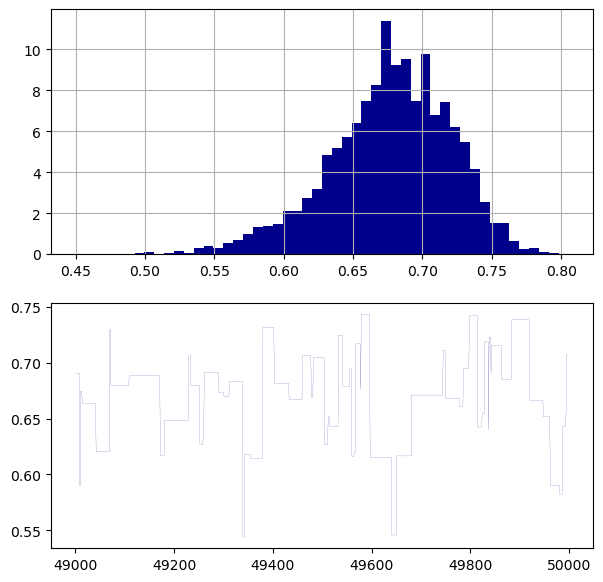

In [14]:
rng = np.random.default_rng(7685)
burn = 1000
n_samples = 51000

rho_array = np.zeros(n_samples)
accepted = 0  # for keeping track of accepted %

rho = 0.1  # init

unif = rng.uniform(size=n_samples)

for i in tqdm(range(n_samples)):
    rho_star = proposal(rho, rng, part="d")

    ratio = target(rho_star) / target(rho)
    if unif[i] < min(1, ratio):
        rho = rho_star
        accepted += 1

    rho_array[i] = rho

rho_burned = rho_array[burn:]

print(f"{np.mean(rho_burned)=:.3f}")
print(f"{np.var(rho_burned)=:.3f}")
print(f"{accepted/n_samples=:.3f}")

lower, upper = np.quantile(rho_burned, (0.05, 0.95))
print(f"90% equitailed credible set: ({lower:.3f}, {upper:.3f})")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))
ax1.grid(True)
ax1.hist(rho_burned, color="darkblue", density=True, bins=50)

ax2.plot(
    range(n_samples - burn * 2, n_samples - burn),
    rho_burned[-burn:],
    color="darkblue",
    linewidth=0.1,
)
plt.savefig("Spring2025HW4Q1d.png")

## Q2

In [16]:
rng = np.random.default_rng(613)

obs = 10000
burn = 500

X = np.loadtxt("flips.csv", delimiter=",", skiprows=1)
n = len(X)

p1_samples = np.zeros(obs)
p2_samples = np.zeros(obs)
m_samples = np.zeros(obs, dtype=int)
m_posterior_weights = np.zeros(n)

p1_samples[0] = 0.5
p2_samples[0] = 0.5
m_samples[0] = 50

alpha1 = beta1 = 2
alpha2 = beta2 = 2

for i in tqdm(range(1, obs)):
    current_m = int(m_samples[i - 1])

    # p1
    sum1 = np.sum(X[:current_m])
    p1_samples[i] = rng.beta(alpha1 + sum1, beta1 + current_m - sum1)
    # p2
    sum2 = np.sum(X[current_m:])
    p2_samples[i] = rng.beta(alpha2 + sum2, beta2 + (n - current_m) - sum2)

    # m
    for j in range(n):
        s1 = np.sum(X[: j + 1])
        s2 = np.sum(X[j + 1 :])
        m_posterior_weights[j] = (
            (p1_samples[i] ** s1)
            * ((1 - p1_samples[i]) ** ((j + 1) - s1))
            * (p2_samples[i] ** s2)
            * ((1 - p2_samples[i]) ** ((n - (j + 1)) - s2))
        )
    weights = m_posterior_weights / np.sum(m_posterior_weights)
    m_samples[i] = rng.choice(np.arange(1, n + 1), replace=False, p=weights)

p1_samples = p1_samples[burn:]
p2_samples = p2_samples[burn:]
m_samples = m_samples[burn:]

  0%|          | 0/9999 [00:00<?, ?it/s]

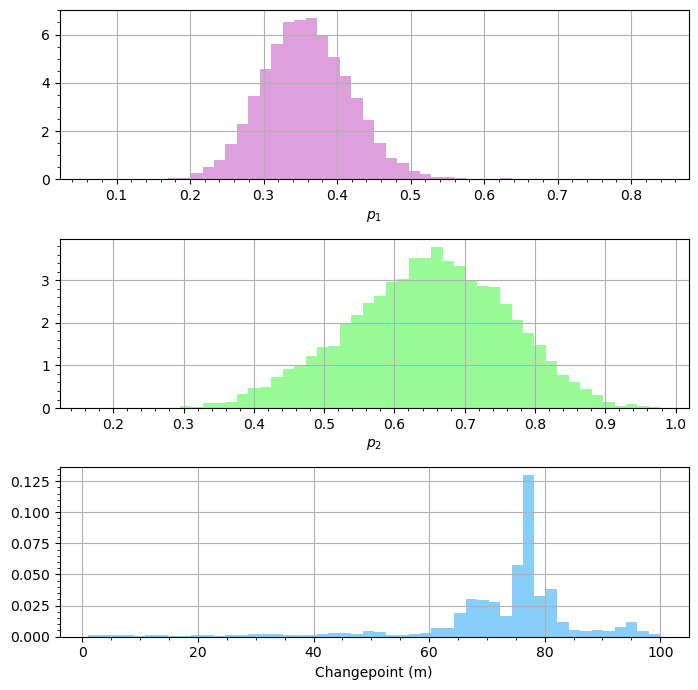

In [40]:
# posterior densities
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 7))

ax1.grid(True)
ax1.hist(p1_samples, color="plum", density=True, bins=50)
ax1.set_xlabel("$p_1$")
ax1.minorticks_on()

ax2.grid(True)
ax2.hist(p2_samples, color="palegreen", density=True, bins=50)
ax2.set_xlabel("$p_2$")
ax2.minorticks_on()

ax3.grid(True)
ax3.hist(m_samples, color="lightskyblue", density=True, bins=50)
ax3.set_xlabel("Changepoint (m)")
ax3.minorticks_on()

plt.tight_layout()
plt.savefig("Spring2025HW4Q2.png")

In [ ]:
from scipy.stats import mode
from arviz import hdi

p1_mean = np.mean(p1_samples)
p2_mean = np.mean(p2_samples)
m_mode = mode(m_samples).mode

p1_hdi = hdi(p1_samples, hdi_prob=0.94)
p2_hdi = hdi(p2_samples, hdi_prob=0.94)
m_hdi = hdi(m_samples, hdi_prob=0.94)

print(f"p1 mean: {p1_mean:.3f}, 94% HDI: [{p1_hdi[0]:.3f}, {p1_hdi[1]:.3f}]")
print(f"p2 mean: {p2_mean:.3f}, 94% HDI: [{p2_hdi[0]:.3f}, {p2_hdi[1]:.3f}]")
print(f"m mode: {m_mode}, 94% HDI: [{m_hdi[0]}, {m_hdi[1]}]")

count_m_eq_n = np.sum(m_samples == n)
prob_m_equals_n = count_m_eq_n / m_samples.shape[0]
posterior_odds_ratio = prob_m_equals_n / (1 - prob_m_equals_n)

print(f"Posterior odds ratio that m=n: {posterior_odds_ratio:.4f}")

p1 mean: 0.360, 94% HDI: [0.249, 0.476]
p2 mean: 0.647, 94% HDI: [0.428, 0.847]
m mode: 77, 94% HDI: [43, 98]
Posterior odds ratio that m=n: 0.0017


In [46]:
count_m_eq_n = np.sum(m_samples == 77)
prob_m_equals_n = count_m_eq_n / m_samples.shape[0]
posterior_odds_ratio = prob_m_equals_n / (1 - prob_m_equals_n)

print(f"Posterior odds ratio that m=77: {posterior_odds_ratio:.4f}")

Posterior odds ratio that m=77: 0.2085


## Q3

In [ ]:
rng = np.random.default_rng(1256)


def mu_cond(rng, n, tau, y_mean):
    mu = (n * tau * y_mean + 0.6) / (n * tau + 1)
    sigma_sq = 1 / (n * tau + 1)
    return rng.normal(loc=mu, scale=np.sqrt(sigma_sq))


def tau_cond(rng, n, mu, y_mean, s2):
    shape = n / 2 + 20
    rate = 0.5 * ((n - 1) * s2 + n * (y_mean - mu) ** 2 + 1)
    return rng.gamma(shape=shape, scale=1 / rate)


n_samples = 11000
burn = 1000

mu_1_samples = np.zeros(n_samples)
mu_2_samples = np.zeros(n_samples)
tau_1_samples = np.zeros(n_samples)
tau_2_samples = np.zeros(n_samples)

# initial values (sampling mus first so no initials needed)
tau_1 = 1
tau_2 = 1

n_1 = 43  # frog 1 is h. chrysoscelis
y_1_mean = 0.65
s2_1 = 0.18**2

n_2 = 12  # frog 2 is h. versicolor
y_2_mean = 0.54
s2_2 = 0.14**2

for i in tqdm(range(n_samples)):
    mu_1 = mu_cond(rng, n_1, tau_1, y_1_mean)
    tau_1 = tau_cond(rng, n_1, mu_1, y_1_mean, s2_1)

    mu_2 = mu_cond(rng, n_2, tau_2, y_2_mean)
    tau_2 = tau_cond(rng, n_2, mu_2, y_2_mean, s2_2)

    mu_1_samples[i] = mu_1
    mu_2_samples[i] = mu_2
    tau_1_samples[i] = tau_1
    tau_2_samples[i] = tau_2


mu_1_minus_mu_2 = mu_1_samples - mu_2_samples
mu_1_minus_mu_2 = mu_1_minus_mu_2[burn:]

  0%|          | 0/11000 [00:00<?, ?it/s]

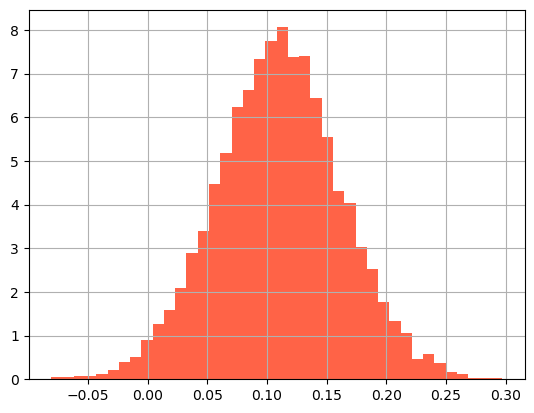

In [71]:
plt.hist(mu_1_minus_mu_2, color="tomato", density=True, bins=40)
plt.grid(True)
plt.savefig("HW4Spring2025Q3.png")

In [5]:
eqt_set = np.quantile(mu_1_minus_mu_2, (0.025, 0.975))
print(f"95% EQT set: [{eqt_set[0]:.3f}, {eqt_set[1]:.3f}]")

95% EQT set: [0.007, 0.213]
